<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/%D0%A1oncrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

## 1) Характеристики набора данных

В наборе данных представлены следующие характерисьтики автомобилей.

Характеристика | Описание
--- | :---
mpg | пробег на обной заправке (миль/галон)
cylinders | количество цилиндров
displacement |  объём цилиндра
horsepower | мощность (лошадиные силы)
weight | вес
acceleration | ускорение
model year | год выпуска
origin | страна производства
car name | название

## 2) Задание

Построить мдель регресси для предсказания значения параметра mpg.

# 3) Загрузка набора данных

1. Загрузить набор данных auto-mpg.xlsx в сесионное хранилище.
1. Создать DataFrame Pandas. Имена столбцов взять из раздела Характеристики набора данных.

In [62]:
# импортировать библиотеку seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Создать DataFrame с колонками из раздела характеристик
# Corrected column names based on Concrete_Data.xlsx
column_names = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'strength']
df = pd.read_excel('Concrete_Data.xlsx', names=column_names)

In [31]:
# Вывести первые 5 строк набора данных
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 4) Изучение набора данных

## 4.1) Определение типов данных столбцов

In [32]:
# Вывести информацию о наборе данных, содержащую сведения о типах данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           1030 non-null   float64
 1   cylinders     1030 non-null   float64
 2   displacement  1030 non-null   float64
 3   horsepower    1030 non-null   float64
 4   weight        1030 non-null   float64
 5   acceleration  1030 non-null   float64
 6   model_year    1030 non-null   float64
 7   origin        1030 non-null   int64  
 8   car_name      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## 4.2) Проверка наличия отсутствующих значений

In [33]:
# Определить количество отсутствующих данных в каждом из столбцов
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


## Заполнение отсутствующих значений или удаление строк с отсутсвующими значениями

Пункт выполняется если в наборе данныъ есть отсутствующие значения

In [34]:
#Ваш код (при необходимости)

#Сделать выводы по разделу 4

---



## 5) Изучение статистических показателей набора данных

In [64]:
# Вывести статистическую информацию о наборе данных
print("Описательная статистика:")
print(df.describe())
print("\nФорма датасета:", df.shape)

Описательная статистика:
            cement         slag          ash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.165631    73.895485    54.187136   181.566359          6.203112   
std     104.507142    86.279104    63.996469    21.355567          5.973492   
min     102.000000     0.000000     0.000000   121.750000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.350000   
75%     350.000000   142.950000   118.270000   192.000000         10.160000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarse_aggregate  fine_aggregate          age     strength  
count       1030.000000     1030.000000  1030.000000  1030.000000  
mean         972.918592      773.578883    45.662136    35.817836  
std           77.753818       80.175427    63.169912    16.

#Сделать выводы по разделу 5

---



# 6) Исследовательский анализ данных

## 6.1) Анализ корреляционной матрицы

Корреляция со strength:
strength            1.000000
cement              0.497833
superplasticizer    0.366102
age                 0.328877
water               0.289613
fine_aggregate      0.167249
coarse_aggregate    0.164928
slag                0.134824
ash                 0.105753
Name: strength, dtype: float64

Существенные признаки (|корреляция| > 0.4):
cement    0.497833
Name: strength, dtype: float64


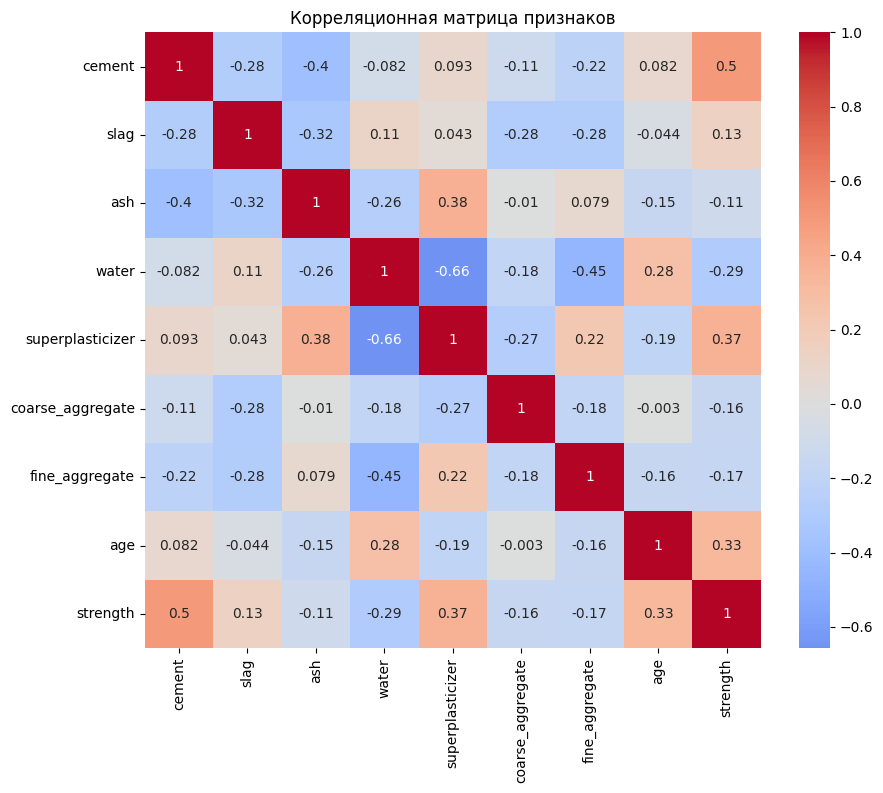

In [69]:
# Вычислить корреляционную матрицу
corr_matrix = df.corr()
# Changed target variable to 'strength' based on the loaded dataset
print("Корреляция со strength:")
strength_correlations = corr_matrix['strength'].abs().sort_values(ascending=False)
print(strength_correlations)

# Найти существенные признаки (|correlation| > 0.7)
# Adjusted threshold to 0.4 as per variable analysis
significant_features = strength_correlations[strength_correlations > 0.4].drop('strength') # Exclude target variable
print(f"\nСущественные признаки (|корреляция| > 0.4):")
print(significant_features)

# Показать корреляционную матрицу визуально
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

#Сделать выводы по разделу 6

---



## 7) Визуализация данных

Выбрать **существенные** признаки.

Под **существенным** будем понимать признак, коэффициент корреляции которого с целевым признаком превышает по абсолютной величине 0.7.

Построить зависимость целевого признака от каждого из существенных.
На графиках должны быть обозначены оси. График должен иметь заголовок

In [70]:
# импортировать библиотеку seaborn
import seaborn as sns
import matplotlib.pyplot as plt
print("Библиотеки для визуализации загружены")

Библиотеки для визуализации загружены


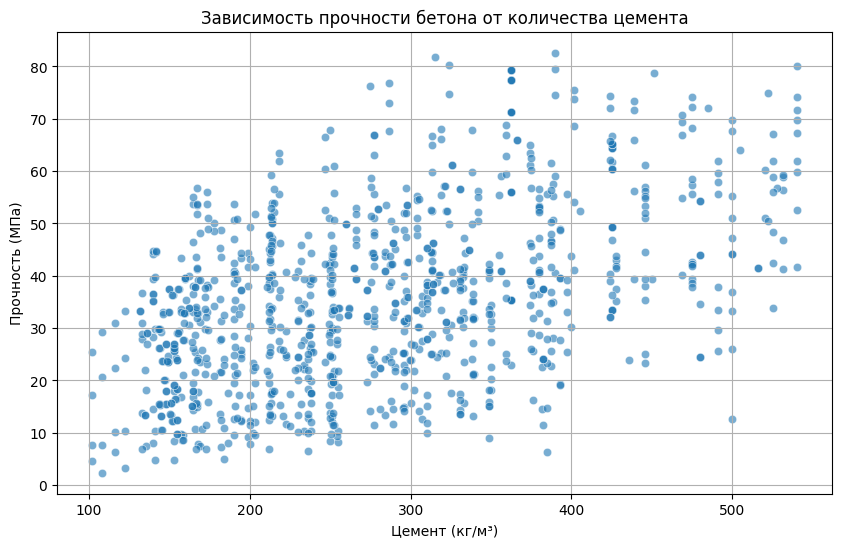

In [72]:
# Построить первый график для наиболее коррелирующего признака - cement
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cement', y='strength', data=df, alpha=0.6)
plt.xlabel('Цемент (кг/м³)')
plt.ylabel('Прочность (МПа)')
plt.title('Зависимость прочности бетона от количества цемента')
plt.grid(True)
plt.show()

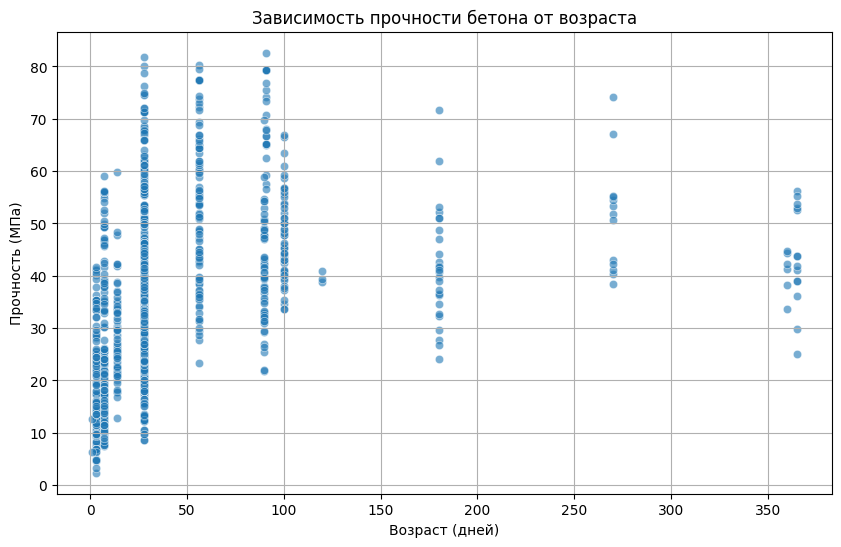

In [73]:
# Построить второй график для признака age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='strength', data=df, alpha=0.6)
plt.xlabel('Возраст (дней)')
plt.ylabel('Прочность (МПа)')
plt.title('Зависимость прочности бетона от возраста')
plt.grid(True)
plt.show()

In [40]:
#Построить третий график.

In [41]:
# Построить четвёртый график.

#Сделать выводы по разделу 7

# 8) одготова данных для обучения

1) Сформировать набор данных, состоящий из существенных признаков. Целевой признак в набор данных не включается.

2) Сформировать набор данных, состоящий из целевого признака.


In [74]:
# 1) Формируем набор данных с признаками
X = df.drop('strength', axis=1)

# 2) Формируем набор данных с целевым признаком
y = df['strength']

print("Первые 5 строк набора признаков X:")
print(X.head())
print("\nПервые 5 строк целевого признака y:")
print(y.head())

Первые 5 строк набора признаков X:
   cement   slag  ash  water  superplasticizer  coarse_aggregate  \
0   540.0    0.0  0.0  162.0               2.5            1040.0   
1   540.0    0.0  0.0  162.0               2.5            1055.0   
2   332.5  142.5  0.0  228.0               0.0             932.0   
3   332.5  142.5  0.0  228.0               0.0             932.0   
4   198.6  132.4  0.0  192.0               0.0             978.4   

   fine_aggregate  age  
0           676.0   28  
1           676.0   28  
2           594.0  270  
3           594.0  365  
4           825.5  360  

Первые 5 строк целевого признака y:
0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64


## 8.1) Выполнить нормализацию данных для набора существенных признаков.

In [75]:
# Импортировать библиотеку preprocessing
from sklearn.preprocessing import StandardScaler

# Создать объект scaler
scaler = StandardScaler()

# Выполнить нормализацию
X_scaled = scaler.fit_transform(X)

# Преобразовать результат обратно в DataFrame для удобства просмотра
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Вывести первые 5 строк нормализованного набора данных
X_scaled_df.head()

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


In [76]:
#Вывести первые 5 строк нормализованного набора данных
display(X_scaled_df.head())

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


## 9) Разделение набора данных

Разделить нормализованный набор данных и набор данных, содержащий целевй признак, на обучающую и тестовую выборки

In [77]:
# Импортировать библиотеку train_test_split
from sklearn.model_selection import train_test_split

# Ваш код для формирования обучающей и тестовой выборок.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки X:", X_train.shape)
print("Размер тестовой выборки X:", X_test.shape)
print("Размер обучающей выборки y:", y_train.shape)
print("Размер тестовой выборки y:", y_test.shape)

Размер обучающей выборки X: (824, 8)
Размер тестовой выборки X: (206, 8)
Размер обучающей выборки y: (824,)
Размер тестовой выборки y: (206,)


# 10) Обучение модели

Обучить модель линейной регрессии.

In [81]:
# Импортировать библиотеку LinearRegression
from sklearn.linear_model import LinearRegression

# Создать и обучить модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 11) Оценка качества модели

Вычислить прогнозные значения для тестового набора данных

In [79]:
# Ваш код для вычисления прогнозных значений
y_pred = model.predict(X_test)

Вычислить оценкbи:


* mean squre error
* $R^2$  
*   explained variance



In [80]:
# Импортировать библиотеку metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Ваш код для вычисления указанных выше оценок
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Mean Squared Error (MSE): 95.98
R^2 Score: 0.63
Explained Variance Score: 0.63


# Выводы по разделу 11

R² Score (0.63): Модель объясняет примерно 63% дисперсии в данных о прочности бетона. Это удовлетворительный, но не идеальный результат для модели линейной регрессии. Это означает, что есть и другие факторы или нелинейные зависимости, которые модель не учла.

Mean Squared Error (MSE) (95.98): Среднеквадратичная ошибка показывает, насколько в среднем предсказания модели отклоняются от реальных значений. Чтобы привести ошибку к тем же единицам, что и целевая переменная, можно извлечь квадратный корень (RMSE), который равен примерно 9.8 МПа. Это означает, что в среднем предсказания модели отклоняются от фактической прочности бетона на 9.8 МПа.

Explained Variance Score (0.63): Этот показатель очень близок к R², что подтверждает согласованность модели и отсутствие значительного смещения (bias) в прогнозах.

Итоговый вывод: Построенная модель линейной регрессии способна с приемлемым качеством предсказывать прочность бетона на основе его компонентов. Для улучшения результатов можно было бы попробовать более сложные модели, например, градиентный бустинг или случайный лес.
